Termination criterion satisfied


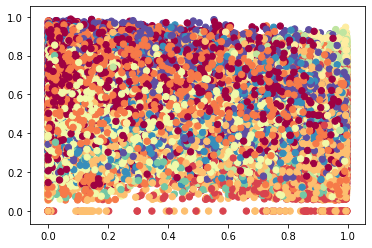

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

class KMeansClustering:
    def __init__(self, X, no_clusters):
        self.K = no_clusters
        self.max_iter = 20
        self.plotfigure = True
        self.no_examples = X.shape[0]
        self.no_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.no_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.no_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest].append(point_idx)



    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.no_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.no_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iter):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plotfigure:
            self.plot_fig(X, y_pred)

        return y_pred


if __name__ == "__main__":
    no_clusters = 10
    df = pd.read_csv("data.csv")
    df = df[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence","popularity"]]
    pca = decomposition.PCA()
    X = np.array(df)
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = pca.fit_transform(X_scaled)
    Kmeans = KMeansClustering(X_pca, no_clusters)
    kclusters = KMeansClustering.create_cluters
    y_pred = Kmeans.fit(X)

NameError: name 'create_clusters' is not defined